In [7]:
import cv2
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
from matplotlib import pyplot

In [2]:
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [8]:
base_model = VGG19(weights='imagenet', include_top=False)

base_model.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [9]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv4').output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [11]:
base_path = '/content/gdrive/My Drive/project'
png_path = base_path + '/png'

In [12]:
image = cv2.imread(png_path + '/1636094537893_62fddd2d26df3c439cfe5d33466d0541_track_2.png')
# 학습 모델에 맞게 영상 크기 수정
image = cv2.resize(image,dsize=(224,224))

In [13]:
image = img_to_array(image)

In [14]:
image

array([[[4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.]],

       [[4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.]],

       [[4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.]],

       ...,

       [[4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.]],

       [[4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.]],

       [[4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.],
        ...,
        [4., 0., 0.],
        [4., 0., 0.],
        [4., 0., 0.]]], dtype=float32)

In [15]:
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
# Feature Map 추출
feature_map = model.predict(image)

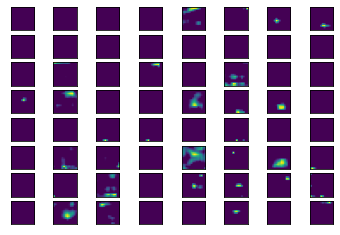

In [16]:
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        ax = pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Feature Map
        pyplot.imshow(feature_map[0,:,:,ix-1])
        ix = ix + 1
pyplot.show()

In [ ]:
model2 = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv4').output)
model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
feature_map2 = model2.predict(image)

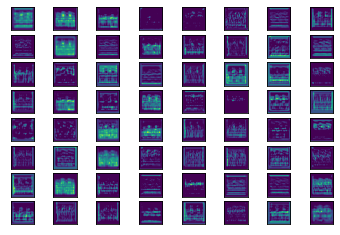

In [ ]:
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        ax = pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Feature Map
        pyplot.imshow(feature_map2[0,:,:,ix-1])
        ix = ix + 1
pyplot.show()

In [ ]:
model3 = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_conv4').output)
model3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
feature_map3 = model3.predict(image)

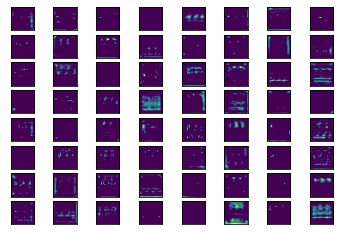

In [ ]:
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        ax = pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Feature Map
        pyplot.imshow(feature_map3[0,:,:,ix-1])
        ix = ix + 1
pyplot.show()